# Collecting the plots

In [8]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from numpy.fft import fft

# Potential energy curve

In [12]:
GL_00 = pd.read_csv('outputs/Energy_profile_00_GL.txt',sep='\s+',header=None)
GL_00 = pd.DataFrame(GL_00)
PZ_00 = pd.read_csv('outputs/Energy_profile_00_PZ.txt',sep='\s+',header=None)
PZ_00 = pd.DataFrame(PZ_00)
PW_00 = pd.read_csv('outputs/Energy_profile_00_PW.txt',sep='\s+',header=None)
PW_00 = pd.DataFrame(PW_00)
HF = pd.read_csv('outputs/Energy_profile_HF.txt',sep='\s+',header=None)
HF = pd.DataFrame(HF)

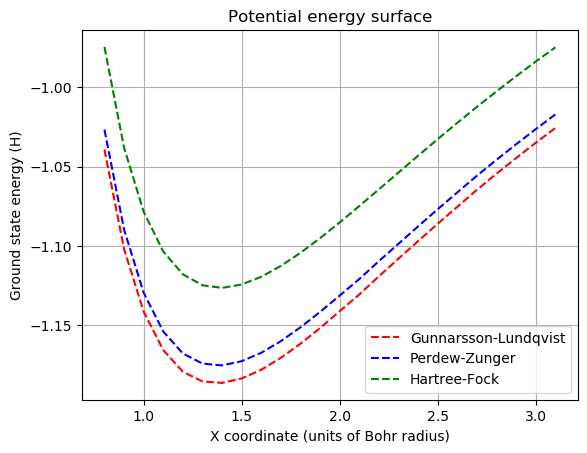

In [20]:
plt.plot(GL_00[0], GL_00[1],'r--', label='Gunnarsson-Lundqvist')
plt.plot(PZ_00[0], PZ_00[1],'b--', label='Perdew-Zunger')
plt.plot(HF[0], HF[1],'g--', label='Hartree-Fock')
plt.grid()
plt.title('Potential energy surface')
plt.xlabel('X coordinate (units of Bohr radius)')
plt.ylabel('Ground state energy (H)')
plt.legend(loc="best")
plt.savefig("outputs/pics/PES.png")

In [17]:
GL_01 = pd.read_csv('outputs/Energy_profile_01_GL.txt',sep='\s+',header=None)
GL_01 = pd.DataFrame(GL_01)
PZ_02 = pd.read_csv('outputs/Energy_profile_02_PZ.txt',sep='\s+',header=None)
PZ_02 = pd.DataFrame(PZ_02)

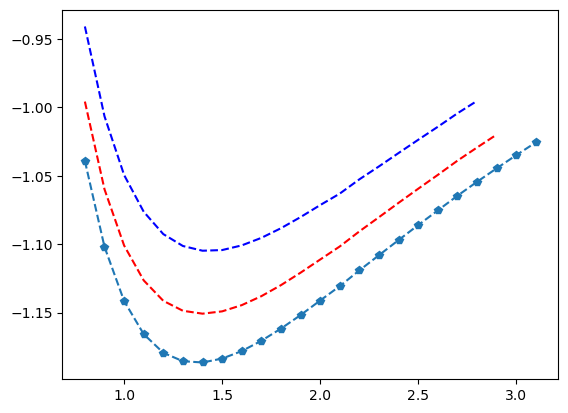

In [19]:
plt.plot(GL_00[0], GL_00[1],'p--', label='Gunnarsson-Lundqvist')
plt.plot(GL_01[0], GL_01[1],'r--', label='Gunnarsson-Lundqvist')
plt.plot(PZ_02[0], PZ_02[1],'b--', label='Perdew-Zunger')

# Ensemble of trajectories

In [16]:

main_dataframe = pd.DataFrame(pd.read_csv(f'outputs/HF_traj/CPMD_HF_0.txt', sep='\s+',header=None))

for i in range(1, 20):
    df = pd.read_csv(f'outputs/HF_traj/CPMD_HF_{i}.txt', sep='\s+',header=None)
    df = pd.DataFrame(df)
    main_dataframe = pd.concat([main_dataframe, df],axis=1)


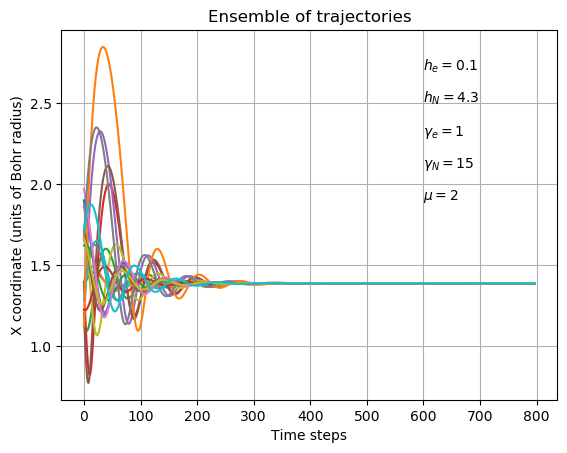

In [27]:
plt.plot(main_dataframe[0])
plt.title('Ensemble of trajectories')
plt.xlabel('Time steps')
plt.grid()
plt.ylabel('X coordinate (units of Bohr radius)')
plt.text(600, 2.7, "$h_{e}=0.1$")
plt.text(600, 2.5, "$h_{N}=4.3$")
plt.text(600, 2.3, "$\gamma_{e}=1$")
plt.text(600, 2.1, "$\gamma_{N}=15$")
plt.text(600, 1.9, "$\mu=2$")
plt.savefig("outputs/pics/traj.png")

# Density plot

In [3]:
density = pd.read_csv(f'outputs/density.txt', sep='\s+',header=None)
N_mesh = 100
rho_a = -1.7
rho_b = 1.7
h = (rho_b - rho_a)/N_mesh
rho = np.arange(rho_a, rho_b, h)
z_a = -2.0
z_b = 3.4
h = (z_b - z_a)/N_mesh
z = np.arange(z_a, z_b, h)
Z, RHO = meshgrid(z, rho) # grid of point

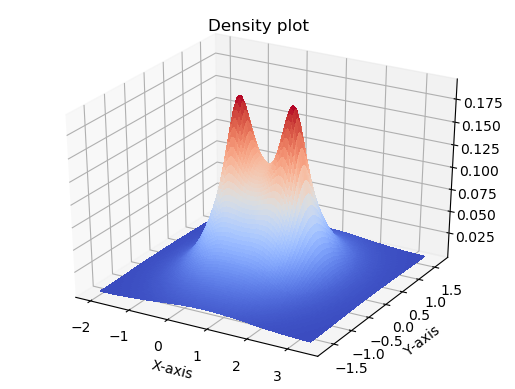

In [69]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Z, RHO, density, rstride=1, cstride=1, 
                      cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title("Density plot")
# Attenzione perché la densità va plottata per una configurazione di equilibrio. 
plt.savefig("outputs/pics/density.png")

# fig, ax = plt.subplots()
# im = plt.imshow(density)

# Car-Parrinello with DFT

In [ ]:
# Qui potrei mettere un confronto tra la traiettoria fatta con HF e una (o più) con DFT. 
# Dobbiamo ottenere anche le due energie cinetiche 

# Conjugate gradient part (CP like)

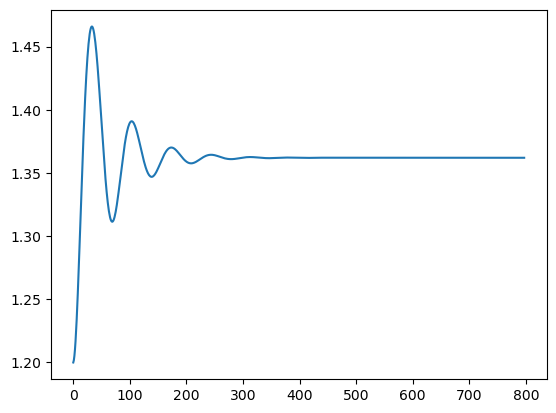

In [10]:
# Qua si può mettere la traittoria col CG e poi fare il plot della normalizzazione (misto)
CG_CP = pd.read_csv(f'outputs/CG_CP_X_energies.txt', sep='\s+',header=None)
CG_CP = pd.DataFrame(CG_CP)
plt.plot(CG_CP[0])

In [8]:
prod_scal = pd.read_csv(f'outputs/scal_prod.txt', sep='\s+',header=None)
prod_scal = pd.DataFrame(prod_scal)

# Conjugate gradient (shake)

Text(0, 0.5, 'X coordinate (units of Bohr radius)')

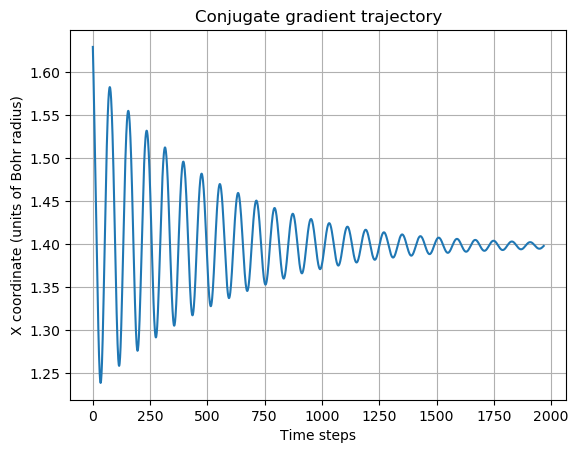

In [4]:
CG_shake = pd.read_csv(f'outputs/CG_shake_X_energies.txt', sep='\s+',header=None)
CG_shake = pd.DataFrame(CG_shake)
plt.plot(CG_shake[0])
plt.title('Conjugate gradient trajectory')
plt.xlabel('Time steps')
plt.grid()
plt.ylabel('X coordinate (units of Bohr radius)')

In [10]:
Fourier = np.fft.fft(CG_shake[0])

# extract real part
x = [ele.real for ele in Fourier]
# extract imaginary part
y = [ele.imag for ele in Fourier]

In [16]:
y

[1.049160758270773e-14,
 -4.532855370087594,
 -3.8575424712948188,
 -2.8261699923962986,
 -2.120185072432168,
 -1.5663622406529665,
 -1.1370491909681135,
 -0.8182783567608372,
 -0.48808383282759227,
 -0.25010478618345755,
 0.015784619902873054,
 0.2960590522084247,
 0.5379289424765101,
 0.8502280634962924,
 1.136726374148827,
 1.4982900805237298,
 1.9377372475300274,
 2.440786830566891,
 3.115226023374322,
 4.033132119531148,
 5.2474901489205035,
 7.348005511756234,
 10.604055959010086,
 17.36954704686075,
 30.866686086339243,
 -6.143088749671147,
 -15.425284814847249,
 -9.801944463181314,
 -7.554605357967902,
 -6.161115067104056,
 -5.26563562196638,
 -4.648822322287477,
 -4.160092729350474,
 -3.792761316512013,
 -3.500901304855103,
 -3.245159292739129,
 -3.043980648043204,
 -2.876192888085531,
 -2.724234244162788,
 -2.610501008382019,
 -2.501051720793029,
 -2.419928203165008,
 -2.346992625540354,
 -2.303110797089948,
 -2.2817288591821976,
 -2.2982318274559836,
 -2.3752538118255426,
 -

# BOMD with shake

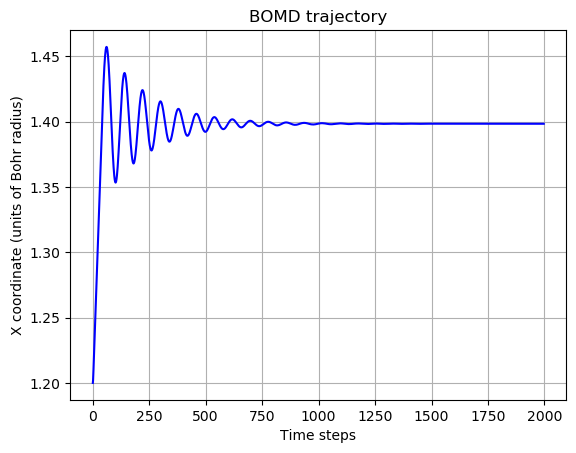

In [26]:
BOMD = pd.read_csv(f'outputs/MD_BO_X_energies.txt', sep='\s+',header=None)
BOMD = pd.DataFrame(BOMD)
plt.plot(BOMD[0], 'b')
plt.title('BOMD trajectory')
plt.xlabel('Time steps')
plt.grid()
plt.ylabel('X coordinate (units of Bohr radius)')
plt.savefig("outputs/pics/BOMD_traj.png")

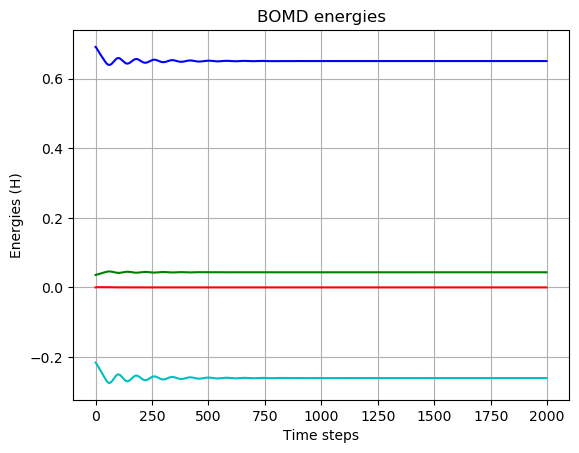

In [32]:
plt.plot(BOMD[2], 'r')
plt.plot(BOMD[3], 'g')
plt.plot(BOMD[4], 'b')
plt.plot(BOMD[5], 'c')
plt.title('BOMD energies')
plt.xlabel('Time steps')
plt.grid()
plt.ylabel('Energies (H)')
plt.savefig("outputs/pics/BOMD_en.png")